In [1]:
# Set de date : Titanic

In [2]:
# Importare librării
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Citire fișiere
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [4]:
# Prelucrare date
def preprocess(df):
    df = df.copy()
    df["Age"].fillna(df["Age"].median(), inplace=True)
    df["Fare"].fillna(df["Fare"].median(), inplace=True)
    df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

    le = LabelEncoder()
    df["Sex"] = le.fit_transform(df["Sex"])
    df["Embarked"] = le.fit_transform(df["Embarked"])

    df.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)
    return df

train_df = preprocess(train_df)
test_df = preprocess(test_df)

X = train_df.drop(columns=["Survived", "PassengerId"])
y = train_df["Survived"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_test_final = test_df.drop(columns=["PassengerId"])

<ipython-input-4-dff1fdc77f7e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
<ipython-input-4-dff1fdc77f7e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin


🔷 Logistic Regression
Acuratețea: 81.01%


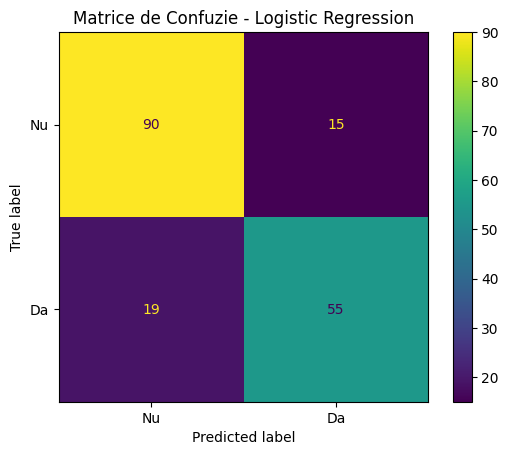

In [5]:
# LOGISTIC REGRESSION
print("\n🔷 Logistic Regression")
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_val)
acc_log = accuracy_score(y_val, y_pred_log)
print(f"Acuratețea: {acc_log * 100:.2f}%")

cm_log = confusion_matrix(y_val, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=["Nu", "Da"])
disp.plot()
plt.title("Matrice de Confuzie - Logistic Regression")
plt.show()

pred_log_test = log_model.predict(X_test_final)



🔷 K-Nearest Neighbors
Acuratețea: 70.39%


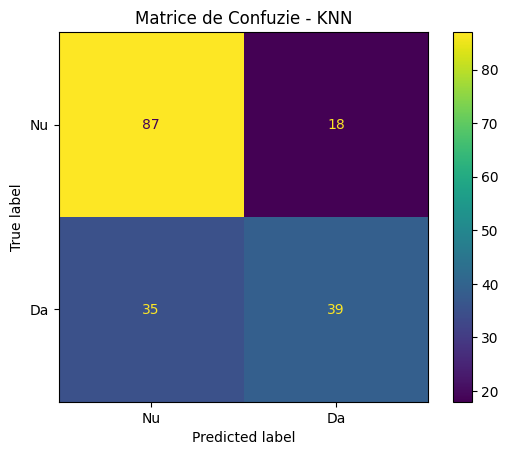

In [6]:
# K-NEAREST NEIGHBORS
print("\n🔷 K-Nearest Neighbors")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_val)
acc_knn = accuracy_score(y_val, y_pred_knn)
print(f"Acuratețea: {acc_knn * 100:.2f}%")

cm_knn = confusion_matrix(y_val, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=["Nu", "Da"])
disp.plot()
plt.title("Matrice de Confuzie - KNN")
plt.show()

pred_knn_test = knn_model.predict(X_test_final)


🔷 Random Forest
Acuratețea: 82.12%


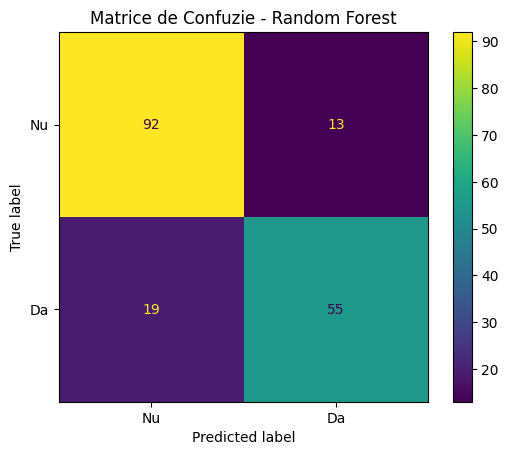

In [7]:
# RANDOM FOREST
print("\n🔷 Random Forest")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
acc_rf = accuracy_score(y_val, y_pred_rf)
print(f"Acuratețea: {acc_rf * 100:.2f}%")

cm_rf = confusion_matrix(y_val, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Nu", "Da"])
disp.plot()
plt.title("Matrice de Confuzie - Random Forest")
plt.show()

pred_rf_test = rf_model.predict(X_test_final)

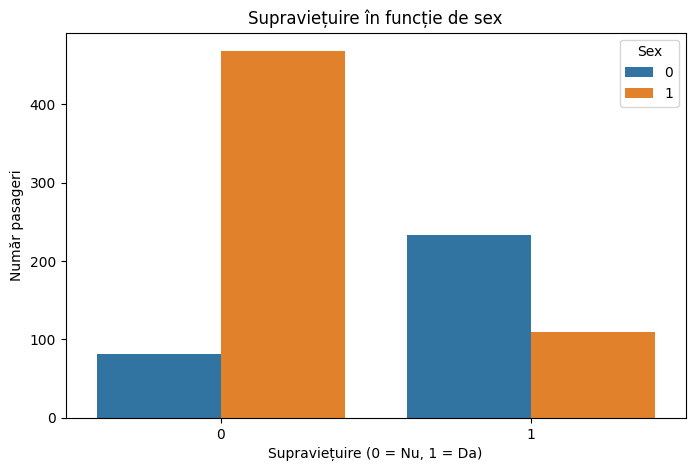

In [8]:
# Grafic 1: Sex vs Supraviețuire
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x="Survived", hue="Sex")
plt.title("Supraviețuire în funcție de sex")
plt.xlabel("Supraviețuire (0 = Nu, 1 = Da)")
plt.ylabel("Număr pasageri")
plt.show()

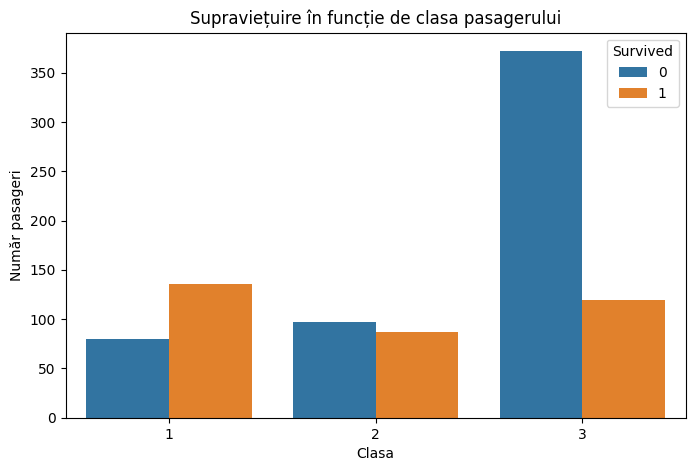

In [9]:
# Grafic 2: Clasă vs Supraviețuire
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x="Pclass", hue="Survived")
plt.title("Supraviețuire în funcție de clasa pasagerului")
plt.xlabel("Clasa")
plt.ylabel("Număr pasageri")
plt.show()

<ipython-input-12-d0864bf626d7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train_df[train_df["Survived"] == 1], x="Age", shade=True, label="Supraviețuit", color="green")
<ipython-input-12-d0864bf626d7>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train_df[train_df["Survived"] == 0], x="Age", shade=True, label="Nu a supraviețuit", color="red")


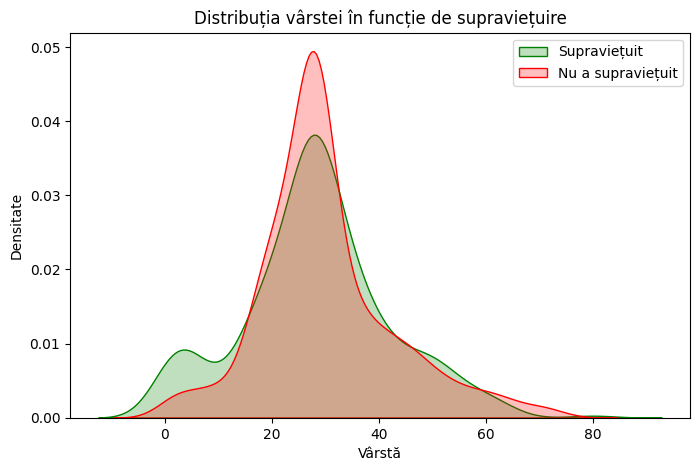

In [12]:
# Grafic 3: Distribuția vârstei în funcție de supraviețuire
plt.figure(figsize=(8, 5))
sns.kdeplot(data=train_df[train_df["Survived"] == 1], x="Age", shade=True, label="Supraviețuit", color="green")
sns.kdeplot(data=train_df[train_df["Survived"] == 0], x="Age", shade=True, label="Nu a supraviețuit", color="red")
plt.title("Distribuția vârstei în funcție de supraviețuire")
plt.xlabel("Vârstă")
plt.ylabel("Densitate")
plt.legend()
plt.show()